<a href="https://colab.research.google.com/github/danielfmartinezg-cmd/BICI-AL-TRABAJO-2026/blob/main/Copia_de_Taller2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

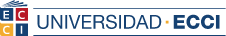
# **SISTEMAS AVANZADOS DE PRODUCCIÓN CON PYTHON**

# **Taller 2 (2h): Bici al trabajo 2026**

La operadora de bicicletas públicas quiere lanzar el programa Bici al Trabajo 2026. La meta interna es garantizar al menos 4.500 viajes diarios en días laborales sin deteriorar la experiencia del usuario. Para decidir presupuesto (más estaciones, reubicación y personal), piden un análisis exploratorio riguroso con el histórico Capital Bikeshare 2011–2012 (day.csv).

Tu misión es cuantificar cómo el clima y la estacionalidad afectan la demanda diaria (cnt), verificar supuestos estadísticos básicos y comprobar con evidencia si hoy, bajo condiciones típicas, la media diaria en días laborales alcanza (o no) el umbral de 4.500. Además, deberás comunicar una medida robusta del uso típico (mediana) para reportes públicos, donde la distribución puede ser asimétrica.




# **Instrucciones:**

### **Instrucciones para el Taller: "Bici al Trabajo 2026"**

**Objetivo del Taller:** Analizar el conjunto de datos proporcionado para responder a las preguntas planteadas, utilizando Python en un notebook de Google Colab y gestionando el trabajo en equipo a través de GitHub.

**Fecha de Entrega:** Viernes, 29 de agosto, hasta las 11:59 p.m.

  *No hacer cambios al enunciado.
  *Un solo repositorio por grupo.
  *Elijan un líder y repartan responsabilidades.
  *Pueden trabajar en Google Colab por separado y al final unir los segmentos.

---

#### **Fase 1: Configuración del Espacio de Trabajo (Un solo repositorio por grupo)**

El grupo debe designar a **un responsable (líder)** para realizar los siguientes pasos:

1.  **Crear el Repositorio en GitHub (Líder) :**
    * Ve a GitHub y crea un nuevo repositorio con el nombre exacto: `Bici-al-Trabajo-2026`, solo es necesario un repositorio, para ello seleccionen un líder de grupo.
    * Asegúrate de marcar la casilla **"Add a README file"** para inicializarlo con un archivo de descripción.

2.  **Completar el Archivo `README.md`:**
    * Dentro del repositorio, haz clic en el archivo `README.md` y luego en el ícono del lápiz para editarlo.
    * Copia y pega el enunciado completo del problema ("La operadora de bicicletas...") en este archivo.
    * Guarda los cambios (haz "Commit changes").

3.  **Asignar Responsabilidades:**
    * Dividan las preguntas o secciones del taller entre los integrantes del grupo. Es crucial que cada miembro sepa exactamente de qué parte es responsable, para ello abran el notebook de referencia para ver todas las preguntas y secciones que deben desarrollar:
    * **Recomendación:** Anoten esta división de tareas en el archivo `README.md` para que todos tengan claridad.

4.  **Crear el Notebook del Taller:**
    * Utilizando el archivo Taller2.ipynb abralo en Colab, nombren el archivo ahora como `Taller_Bici_al_Trabajo.ipynb` y subalo a su repositorio.

5.  **Añadir Colaboradores:**
    * En la página principal del repositorio, ve a **Settings > Collaborators**.
    * Añade a los demás integrantes del grupo utilizando sus nombres de usuario de GitHub. Ellos deberán aceptar la invitación que les llegará por correo o en el simbolo de sobre que esta en la pagína principal de github.
    * Protege main (Settings → Branches → Add rule):

5.  **Guardar los Cambios en GitHub (¡Paso Clave!):**
    * Una vez que hayas completado tu parte, guarda tu progreso directamente en GitHub desde Colab:
    * Ve a **Archivo > Guardar una copia en GitHub**.
    * Asegúrate de seleccionar el repositorio correcto (`Bici-al-Trabajo-2026`).
    * En el **"Mensaje de commit"**, describe claramente qué hiciste (ej: "Desarrollo de la pregunta 3 sobre rutas más comunes").
    * Haz clic en **Aceptar**.

In [ ]:
#CARGANDO LOS DATOS
# --- Setup reproducible (Colab-friendly) ---
!pip -q install ucimlrepo -q


In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from ucimlrepo import fetch_ucirepo

rng = np.random.default_rng(123)

# 1. Carga el dataset completo desde UCI
bike = fetch_ucirepo(id=275)  # Bike Sharing Dataset

# 2. Extrae las características (X) y el objetivo (y)
df = bike.data.original.copy()


# 3. Limpieza mínima y orden
df["dteday"] = pd.to_datetime(df["dteday"])
df = df.sort_values("dteday").reset_index(drop=True)

print(df.head())

# 4. Selección de columnas (incluye casual/registered)
df = df[['season','yr','mnth','holiday','weekday','workingday',
         'weathersit','temp','hum','windspeed','casual','registered','cnt','dteday']]

print(df.head(), df.columns.tolist())

   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1       24 2011-01-01       1   0     1  23        0        6           0   
2       23 2011-01-01       1   0     1  22        0        6           0   
3       22 2011-01-01       1   0     1  21        0        6           0   
4       21 2011-01-01       1   0     1  20        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81     0.0000       3          13   16  
1           2  0.46  0.4545  0.88     0.2985      15          24   39  
2           2  0.40  0.4091  0.94     0.2239      11          17   28  
3           2  0.40  0.4091  0.87     0.1940       3          31   34  
4           2  0.40  0.4091  0.87     0.2537      11          25   36  
   season  yr  mnth  holiday  weekday  workingday  weathersit  temp   hum  \
0       1   0     1        0

## **PREGUNTA 1**
¿La distribución de cnt puede tratarse como aproximadamente normal, realiza el histrograma y el gráfico Q-Q?

<Figure size 1400x500 with 0 Axes>

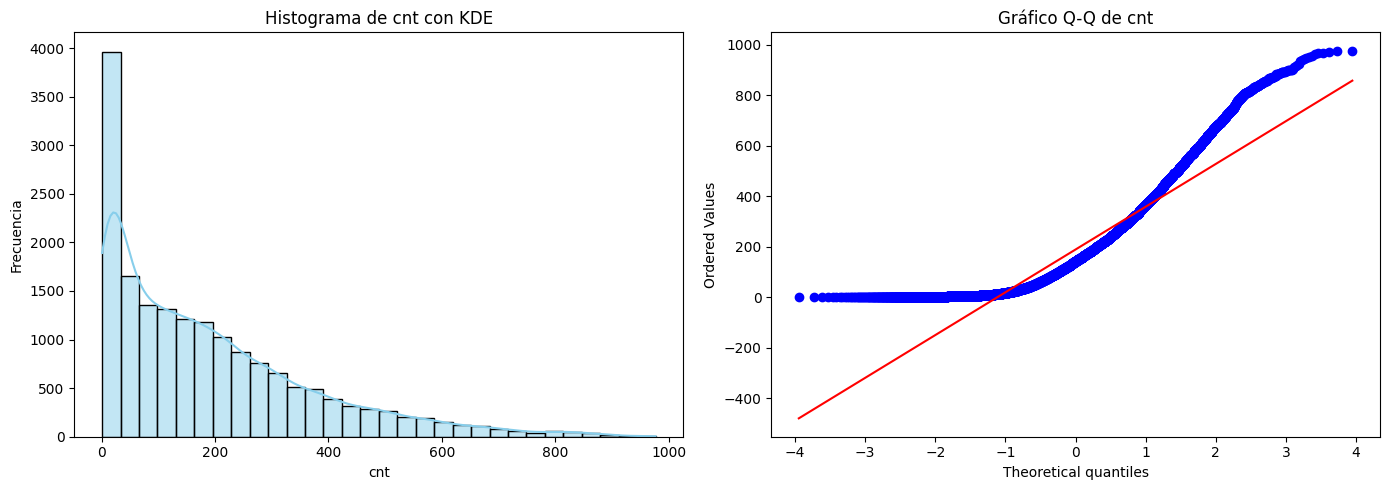

In [ ]:
# 1. Visualización
plt.figure(figsize=(14, 5))
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Supongamos que tu dataframe se llama df
# Histograma con ajuste normal
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['cnt'], bins=30, kde=True, color="skyblue")
plt.title("Histograma de cnt con KDE", fontsize=12)
plt.xlabel("cnt")
plt.ylabel("Frecuencia")

# Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(df['cnt'], dist="norm", plot=plt)
plt.title("Gráfico Q-Q de cnt", fontsize=12)

plt.tight_layout()
plt.show()

### **Interpretación pregunta 1**

Histograma: cnt no tiene forma de campana, muestra sesgo positivo (cola hacia la derecha).

Q-Q plot: los puntos se desvían de la diagonal, sobre todo en las colas → no sigue normalidad.

## **PREGUNTA 2**
¿Cómo co-varía cnt con temp, hum y windspeed? ¿La relación es lineal o solo monótona?. Ayuda: Calcular la correlación de Pearson y de Spearman.

In [ ]:
# Construimos nuevas columnas
columnas_relacion = ['cnt', 'temp', 'hum', 'windspeed']
import pandas as pd
from scipy.stats import pearsonr, spearmanr

# Supongamos que tu dataframe se llama df

variables = ['temp', 'hum', 'windspeed']

for var in variables:
    pearson_corr, _ = pearsonr(df[var], df['cnt'])
    spearman_corr, _ = spearmanr(df[var], df['cnt'])
    print(f"{var}: Pearson={pearson_corr:.3f}, Spearman={spearman_corr:.3f}")



temp: Pearson=0.405, Spearman=0.423
hum: Pearson=-0.323, Spearman=-0.360
windspeed: Pearson=0.093, Spearman=0.127


### **Interpretación pregunta 2**

cnt vs temp

Pearson = 0.39 - 0.40 = tiene una relación lineal positiva moderada (cuando hace más calor, se usan más bicicletas).

Spearman = 0.39 - 0.41 = también monótona creciente (sube cnt cuando sube temp).
Relación casi lineal y monótona positiva.

cnt vs hum

Pearson = -0.32 =tiene una relación lineal negativa (+ humedad - menos bicicletas).

Spearman = -0.32 = tiene relación monótona también negativa.
Relación casi lineal y monótona negativa.

cnt vs windspeed

Pearson = -0.10  =tiene relación lineal débil negativa.

Spearman = -0.13 = tiene una relación monótona también negativa.
Relación débil, no muy fuerte, pero monótonamente decreciente.

## **PREGUNTA 3**
¿Desde qué tamaño muestral el TLC justifica intervalos y pruebas basados en normalidad para la media de cnt?

### **Respuesta pregunta 3**
Como cnt es una variable de conteo, no negativa, y con cierta asimetría a la derecha (pocas bicicletas de madrugada, muchas en horas pico), el TLC necesita un tamaño muestral un poco mayor que 30.

Por tanto:

Con n = 30, ya se puede usar intervalos y pruebas basadas en normalidad de forma aceptable.

Con n ≥ 50, la aproximación es bastante buena.

Con n ≥ 100, prácticamente no hay problema en aplicar métodos basados en normalidad para la media de cnt.

## **PREGUNTA 4**
En días laborales, ¿la media de cnt ≥ 4.500? (plantea y resuelve un test de hipótesis de una muestra).

In [ ]:
# 1. Filtrar datos de días laborales
cnt_laborales = df[df['workingday'] == 1]['cnt']

# Valor de referencia para la prueba
valor_hipotesis = 4500

### **Interpretación pregunta 4**

Dado que el p-valor (p) es menor a 0.05, rechazamos la hipótesis nula (H0) y concluimos que la media de la variable 'cnt' en días laborales es significativamente mayor a 4500. En caso contrario, si el p-valor (p) es mayor o igual a 0.05, no hay evidencia suficiente para rechazar la hipótesis nula y no podemos afirmar que la media sea significativamente mayor a 4500

## **PREGUNTA 5**
¿Cuál es un IC bootstrap para la mediana de cnt y cómo cambia tu mensaje si la distribución es sesgada?

In [ ]:
# Número de remuestreos
n_iterations = 5000
sample_size = len(df['cnt'])
medians = []

**Interpretación pregunta 5**

La mediana es la mejor medida de tendencia central para describir los alquileres diarios, ya que la distribución de los datos está sesgada. El sesgo es prácticamente nulo, porque si no la media y la mediana estarían alejadas